# Ch.6　Gauss 過程と関数データ解析

In [2]:
# 第 6 章のプログラムは，事前に下記が実行されていることを仮定する。
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.decomposition import PCA
import skfda

C:\Users\prof-\anaconda3\lib\site-packages\dcor\_fast_dcov_avl.py:67: NumbaWarning: Cannot cache compiled function "_partial_sum_2d" as it uses outer variables in a closure
  def _partial_sum_2d(x, y, c, ix, iy, sx_c, sy_c, c_sum, l_max,
C:\Users\prof-\anaconda3\lib\site-packages\dcor\_fast_dcov_avl.py:94: NumbaWarning: Cannot cache compiled function "_distance_covariance_sqr_avl_impl" as it uses outer variables in a closure
  def _distance_covariance_sqr_avl_impl(
C:\Users\prof-\anaconda3\lib\site-packages\dcor\_fast_dcov_mergesort.py:99: NumbaWarning: Cannot cache compiled function "_compute_aijbij_term" as it uses outer variables in a closure
  def _compute_aijbij_term(x, y):
C:\Users\prof-\anaconda3\lib\site-packages\dcor\_fast_dcov_mergesort.py:163: NumbaWarning: Cannot cache compiled function "_distance_covariance_sqr_mergesort_generic_impl" as it uses outer variables in a closure
  def _distance_covariance_sqr_mergesort_generic_impl(x, y, unbiased):


## 6.1　回帰

### 例83

In [3]:
# (m, k) の定義
def m(x):
    return 0


def k(x, y):
    return np.exp(-(x-y)**2 / 2)


# 関数 gp_sample の定義
def gp_sample(x, m, k):
    n = len(x)
    m_x = m(x)
    k_xx = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            k_xx[i, j] = k(x[i], x[j])
    R = np.linalg.cholesky(k_xx)  # lower triangular matrix
    u = np.random.randn(n)
    return R.dot(u) + m_x

In [4]:
# 乱数を発生して，共分散行列を生成し，k_xx と比較
x = np.arange(-2, 3, 1)
n = len(x)
r = 100
z = np.zeros((r, n))
for i in range(r):
    z[i, :] = gp_sample(x, m, k)
k_xx = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        k_xx[i, j] = k(x[i], x[j])

print("cov(z):\n", np.cov(z), "\n")
print("k_xx:\n", k_xx)

cov(z):
 [[ 0.06914941  0.16064978 -0.09471811 ...  0.02849903 -0.01427444
   0.02651806]
 [ 0.16064978  0.3837613  -0.20560438 ...  0.10453557 -0.0142069
   0.05009318]
 [-0.09471811 -0.20560438  0.16525964 ...  0.0363642  -0.00187607
  -0.11236538]
 ...
 [ 0.02849903  0.10453557  0.0363642  ...  0.18935271 -0.04741025
  -0.14552592]
 [-0.01427444 -0.0142069  -0.00187607 ... -0.04741025  0.52771924
   0.3811954 ]
 [ 0.02651806  0.05009318 -0.11236538 ... -0.14552592  0.3811954
   0.40018362]] 

k_xx:
 [[1.00000000e+00 6.06530660e-01 1.35335283e-01 1.11089965e-02
  3.35462628e-04]
 [6.06530660e-01 1.00000000e+00 6.06530660e-01 1.35335283e-01
  1.11089965e-02]
 [1.35335283e-01 6.06530660e-01 1.00000000e+00 6.06530660e-01
  1.35335283e-01]
 [1.11089965e-02 1.35335283e-01 6.06530660e-01 1.00000000e+00
  6.06530660e-01]
 [3.35462628e-04 1.11089965e-02 1.35335283e-01 6.06530660e-01
  1.00000000e+00]]


### 例84

In [5]:
# (m, k) の定義
def m(x):
    return 0


def k(x, y):
    return np.exp(-np.sum((x-y)**2)/2)


# 関数 gp_sample の定義
def gp_sample(x, m, k):
    n = x.shape[0]
    m_x = m(x)
    k_xx = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            k_xx[i, j] = k(x[i], x[j])
    R = np.linalg.cholesky(k_xx)  # lower triangular matrix
    u = np.random.randn(n)
    return R.dot(u) + m_x

In [6]:
# 乱数を発生して，共分散行列を生成し，k_xx と比較
n = 5
r = 100
z = np.zeros((r, n))
for i in range(r):
    z[i, :] = gp_sample(x, m, k)
k_xx = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        k_xx[i, j] = k(x[i], x[j])

print("cov(z):\n", np.cov(z), "\n")
print("k_xx:\n", k_xx)

cov(z):
 [[ 0.30314106 -0.29183062 -0.02187815 ... -0.0682088  -0.06640204
  -0.50134237]
 [-0.29183062  0.51453766 -0.17614077 ... -0.04737735 -0.19185101
   0.43068395]
 [-0.02187815 -0.17614077  0.35398136 ...  0.03943037  0.3101588
   0.30117541]
 ...
 [-0.0682088  -0.04737735  0.03943037 ...  0.11906637  0.08154604
   0.05737994]
 [-0.06640204 -0.19185101  0.3101588  ...  0.08154604  0.3643522
   0.28085504]
 [-0.50134237  0.43068395  0.30117541 ...  0.05737994  0.28085504
   1.10596236]] 

k_xx:
 [[1.00000000e+00 6.06530660e-01 1.35335283e-01 1.11089965e-02
  3.35462628e-04]
 [6.06530660e-01 1.00000000e+00 6.06530660e-01 1.35335283e-01
  1.11089965e-02]
 [1.35335283e-01 6.06530660e-01 1.00000000e+00 6.06530660e-01
  1.35335283e-01]
 [1.11089965e-02 1.35335283e-01 6.06530660e-01 1.00000000e+00
  6.06530660e-01]
 [3.35462628e-04 1.11089965e-02 1.35335283e-01 6.06530660e-01
  1.00000000e+00]]


In [7]:
def gp_1(x_pred):
    h = np.zeros(n)
    for i in range(n):
        h[i] = k(x_pred, x[i])
    R = np.linalg.inv(K + sigma_2 * np.identity(n))  # O(n^3) の計算
    mm = mu(x_pred) + np.dot(np.dot(h.T, R), (y - mu(x)))
    ss = k(x_pred, x_pred) - np.dot(np.dot(h.T, R), h)
    return {"mm": mm, "ss": ss}


def gp_2(x_pred):
    h = np.zeros(n)
    for i in range(n):
        h[i] = k(x_pred, x[i])
    L = np.linalg.cholesky(K + sigma_2 * np.identity(n))      # O(n^3/3) の計算
    alpha = np.linalg.solve(L,
                            np.linalg.solve(L.T, (y - mu(x))))  # O(n^2) の計算
    mm = mu(x_pred) + np.sum(np.dot(h.T, alpha))
    gamma = np.linalg.solve(L.T, h)                             # O(n^2) の計算
    ss = k(x_pred, x_pred) - np.sum(gamma**2)
    return {"mm": mm, "ss": ss}

### 例85

In [8]:
sigma_2 = 0.2


def k(x, y):                                    # 共分散関数
    return np.exp(-(x - y)**2 / 2 / sigma_2)


def mu(x):                                      # 平均関数
    return x

time1 = 0.009197711944580078
time2 = 0.008885383605957031


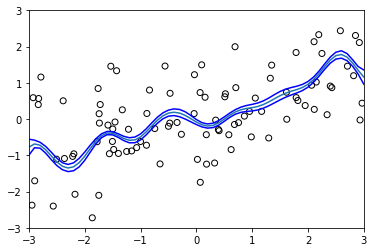

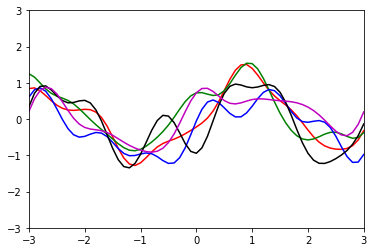

In [9]:
n = 100
x = np.random.uniform(size=n) * 6 - 3
y = np.sin(x / 2) + np.random.randn(n)
K = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        K[i, j] = k(x[i], x[j])

# 実行時間を測定
import time
start1 = time.time()
gp_1(0)
end1 = time.time()
print("time1 =", end1 - start1)
start2 = time.time()
gp_2(0)
end2 = time.time()
print("time2 =", end2 - start2)

# 平均の前後で 3 sigma の幅を記載
u_seq = np.arange(-3, 3.1, 0.1)
v_seq = []
w_seq = []
for u in u_seq:
    res = gp_1(u)
    v_seq.append(res["mm"])
    w_seq.append(res["ss"])

plt.figure()
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.scatter(x, y, facecolors="none", edgecolors="k", marker="o")
plt.plot(u_seq, v_seq)
plt.plot(u_seq, np.sum([v_seq, [i * 3 for i in w_seq]], axis=0), c="b")
plt.plot(u_seq, np.sum([v_seq, [i * (-3) for i in w_seq]], axis=0), c="b")
plt.show()
n = 100
plt.figure()
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# サンプルを変えて 5 回
color = ["r", "g", "b", "k", "m"]
for h in range(5):
    x = np.random.uniform(size=n) * 6 - 3
    y = np.sin(np.pi * x / 2) + np.random.randn(n)
    sigma_2 = 0.2
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = k(x[i], x[j])
    u_seq = np.arange(-3, 3.1, 0.1)
    v_seq = []
    for u in u_seq:
        res = gp_1(u)
        v_seq.append(res["mm"])
    plt.plot(u_seq, v_seq, c=color[h])

## 6.2　分類

### 例86

In [10]:
from sklearn.datasets import load_iris
df = load_iris()           # Iris データ
x = df.data[0:100, 0:4]
y = np.array([1]*50 + [-1]*50)
n = len(y)


# 4 個の共変量でカーネルを計算
def k(x, y):
    return np.exp(np.sum(-(x - y)**2) / 2)


K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = k(x[i, :], x[j, :])
eps = 0.00001
f = [0] * n
g = [0.1] * n

while np.sum((np.array(f) - np.array(g))**2) > eps:
    i = i + 1
    g = f                 # 比較のため，更新前の値を保存する
    f = np.array(f)
    y = np.array(y)
    v = np.exp(-y * f)
    u = y * v / (1 + v)
    w = (v / (1 + v)**2)
    W = np.diag(w)
    W_p = np.diag(w**0.5)
    W_m = np.diag(w**(-0.5))
    L = np.linalg.cholesky(np.identity(n) + np.dot(np.dot(W_p, K), W_p))
    gamma = W.dot(f) + u
    beta = np.linalg.solve(L, np.dot(np.dot(W_p, K), gamma))
    alpha = np.linalg.solve(np.dot(L.T, W_m), beta)
    f = np.dot(K, (gamma - alpha))
print(list(f))

[2.9017597728506903, 2.6661877410648125, 2.735999714975541, 2.5962146616446793, 2.8888259653434902, 2.4229904289075734, 2.7128370653298717, 2.8965829899125057, 2.263839959450692, 2.722794155018708, 2.6757868220665557, 2.80427691289934, 2.629916582197861, 2.129058875598969, 1.9947371858903622, 1.7255773341842824, 2.502403800007298, 2.894767948521167, 2.211715451090947, 2.7578887454424845, 2.5807025000167654, 2.7884335002993703, 2.4501472162360978, 2.598252566107158, 2.49363291477457, 2.5892721299617927, 2.7995603132602014, 2.854337885531593, 2.8580336326051525, 2.682198311711416, 2.6631803480277263, 2.6529515170091735, 2.409809417765029, 2.1570288906747956, 2.738196179682446, 2.777507355522734, 2.6054932709605585, 2.8486244905053546, 2.342636360704147, 2.8826825981318938, 2.887406385036485, 1.561916989035174, 2.4541693614670925, 2.64939855108404, 2.4071165717812315, 2.633906076076528, 2.7271240196093944, 2.6732162909902857, 2.749570997237667, 2.884288422112919, -1.870441763888594, -2.53

In [11]:
def pred(z):
    kk = np.zeros(n)
    for i in range(n):
        kk[i] = k(z, x[i, :])
    mu = np.sum(kk * u)                      # 平均
    alpha = np.linalg.solve(L, np.dot(W_p, kk))
    sigma2 = k(z, z) - np.sum(alpha**2)      # 分散
    m = 1000
    b = np.random.normal(mu, sigma2, size=m)
    pi = np.sum((1 + np.exp(-b))**(-1)) / m  # 予測値
    return pi

### 例87

In [12]:
z = np.zeros(4)
for j in range(4):
    z[j] = np.mean(x[:50, j])
pred(z)

0.9461835859315092

In [13]:
for j in range(4):
    z[j] = np.mean(x[50:100, j])
pred(z)

0.05277626581686638

## 6.3　補助変数法

### 例88

In [14]:
sigma_2 = 0.05        # 本来は，推定すべき


def k(x, y):          # 共分散関数
    return np.exp(-(x - y)**2 / 2 / sigma_2)


def mu(x):            # 平均関数
    return x


# データ生成
n = 200
x = np.random.uniform(size=n) * 6 - 3
y = np.sin(x / 2) + np.random.randn(n)
eps = 10**(-6)

In [15]:
m = 100
K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = k(x[i], x[j])
index = np.random.choice(n, size=m, replace=False)
z = x[index]
m_x = 0
m_z = 0
K_zz = np.zeros((m, m))
for i in range(m):
    for j in range(m):
        K_zz[i, j] = k(z[i], z[j])

K_xz = np.zeros((n, m))
for i in range(n):
    for j in range(m):
        K_xz[i, j] = k(x[i], z[j])
K_zz_inv = np.linalg.inv(K_zz + np.diag([10**eps]*m))
lam = np.zeros(n)
for i in range(n):
    lam[i] = k(x[i], x[i]) - np.dot(np.dot(K_xz[i, 0:m], K_zz_inv),
                                    K_xz[i, 0:m])
lam_0_inv = np.diag(1 / (lam + sigma_2))
Q = K_zz + np.dot(np.dot(K_xz.T, lam_0_inv), K_xz)
Q_inv = np.linalg.inv(Q + np.diag([eps] * m))
muu = np.dot(np.dot(np.dot(Q_inv, K_xz.T), lam_0_inv), y - m_x)
dif = K_zz_inv - Q_inv
R = np.linalg.inv(K + sigma_2 * np.identity(n))

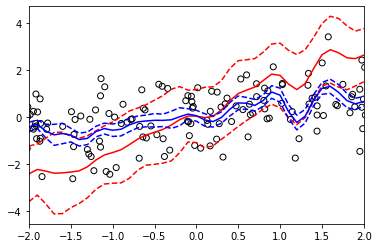

In [16]:
def gp_ind(x_pred):  # 補助変数法を用いる
    h = np.zeros(m)
    for i in range(m):
        h[i] = k(x_pred, z[i])
    mm = mu(x_pred) + h.dot(muu)
    ss = k(x_pred, x_pred) - h.dot(dif).dot(h)
    return {"mm": mm, "ss": ss}


def gp_1(x_pred):    # 補助変数法を用いない
    h = np.zeros(n)
    for i in range(n):
        h[i] = k(x_pred, x[i])
    mm = mu(x_pred) + np.dot(np.dot(h.T, R), y - mu(x))
    ss = k(x_pred, x_pred) - np.dot(np.dot(h.T, R), h)
    return {"mm": mm, "ss": ss}


x_seq = np.arange(-2, 2.1, 0.1)
mmv = []
ssv = []
for u in x_seq:
    mmv.append(gp_ind(u)["mm"])
    ssv.append(gp_ind(u)["ss"])

plt.figure()
plt.plot(x_seq, mmv, c="r")
plt.plot(x_seq, np.array(mmv) + 3 * np.sqrt(np.array(ssv)),
         c="r", linestyle="--")
plt.plot(x_seq, np.array(mmv) - 3 * np.sqrt(np.array(ssv)),
         c="r", linestyle="--")
plt.xlim(-2, 2)
plt.plot(np.min(mmv), np.max(mmv))

x_seq = np.arange(-2, 2.1, 0.1)
mmv = []
ssv = []
for u in x_seq:
    mmv.append(gp_1(u)["mm"])
    ssv.append(gp_1(u)["ss"])

mmv = np.array(mmv)
ssv = np.array(ssv)

plt.plot(x_seq, mmv, c="b")
plt.plot(x_seq, mmv + 3 * np.sqrt(ssv), c="b", linestyle="--")
plt.plot(x_seq, mmv - 3 * np.sqrt(ssv), c="b", linestyle="--")
plt.scatter(x, y, facecolors='none', edgecolors="k", marker="o")

## 6.4　Karhunen-L&#243;eve 展開

### 例89

Text(0.5, 1.0, 'Brown Motion')

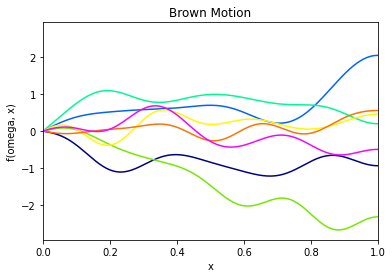

In [17]:
def lam(j):           # 固有値
    return 4 / ((2 * j - 1) * np.pi)**2


def ee(j, x):         # 固有関数の定義
    return np.sqrt(2) * np.sin((2 * j - 1) * np.pi / 2 * x)


n = 10
m = 7


# Gauss 過程の定義
def f(z, x):
    n = len(z)
    S = 0
    for i in range(n):
        S = S + z[i] * ee(i, x) * np.sqrt(lam(i))
    return S


plt.figure()
plt.xlim(0, 1)
plt.xlabel("x")
plt.ylabel("f(omega, x)")
colormap = plt.cm.gist_ncar  # nipy_spectral, Set1, Paired
colors = [colormap(i) for i in np.linspace(0, 0.8, m)]

for j in range(m):
    z = np.random.randn(n)
    x_seq = np.arange(0, 3.001, 0.001)
    y_seq = []
    for x in x_seq:
        y_seq.append(f(z, x))
    plt.plot(x_seq, y_seq, c=colors[j])

plt.title("Brown Motion")

In [19]:
from scipy.special import gamma


def matern(nu, l, r):
    p = nu - 1 / 2
    S = 0
    for i in range(int(p+1)):
        S = S + gamma(p + i + 1) / gamma(i + 1) / gamma(p - i + 1) \
            * (np.sqrt(8 * nu) * r / l)**(p - i)
    S = S * gamma(p + 2) / gamma(2 * p + 1) * np.exp(-np.sqrt(2 * nu) * r / l)
    return S

### 例90

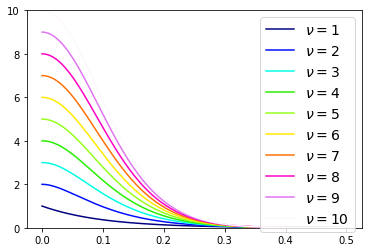

In [20]:
m = 10
l = 0.1
colormap = plt.cm.gist_ncar  # nipy_spectral, Set1, Paired
color = [colormap(i) for i in np.linspace(0, 1, len(range(m)))]
x = np.linspace(0, 0.5, 200)
plt.plot(x, matern(1 - 1/2, l, x), c=color[0], label=r"$\nu=%d$" % 1)
plt.ylim(0, 10)
for i in range(2, m + 1):
    plt.plot(x, matern(i - 1/2, l, x), c=color[i - 1], label=r"$\nu=%d$" % i)

plt.legend(loc="upper right", frameon=True, prop={"size": 14})

### 例91

Text(0.5, 1.0, 'Matern process (nu = 3/2, l = 0.1)')

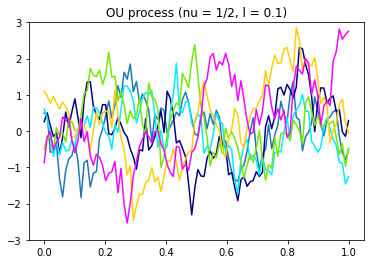

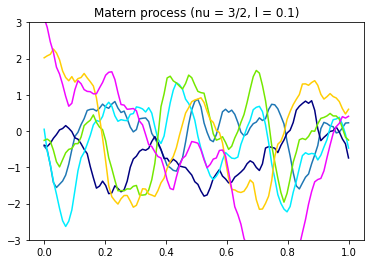

In [21]:
colormap = plt.cm.gist_ncar  # nipy_spectral, Set1, Paired
colors = [colormap(i) for i in np.linspace(0, 0.8, 5)]


def rand_100(Sigma):
    L = np.linalg.cholesky(Sigma)    # 共分散行列を Cholesky 分解
    u = np.random.randn(100)
    y = L.dot(u)  # 平均 0 の共分散行列 Sigma の乱数を 1 組発生
    return y


x = np.linspace(0, 1, 100)
z = np.abs(np.subtract.outer(x, x))  # 距離行列を計算
l = 0.1
Sigma_OU = np.exp(-z / l)            # OU: matern(0.5, l, z) では遅い
y = rand_100(Sigma_OU)

plt.figure()
plt.plot(x, y)
plt.ylim(-3, 3)
for i in range(5):
    y = rand_100(Sigma_OU)
    plt.plot(x, y, c=colors[i])
plt.title("OU process (nu = 1/2, l = 0.1)")

Sigma_M = matern(3/2, l, z)          # 行列
y = rand_100(Sigma_M)
plt.figure()
plt.plot(x, y)
plt.ylim(-3, 3)
for i in range(5):
    y = rand_100(Sigma_M)
    plt.plot(x, y, c=colors[i])
plt.title("Matern process (nu = 3/2, l = 0.1)")

## 6.5　関数データ解析

### 例92

In [22]:
X, y = skfda.datasets.fetch_weather(return_X_y=True, as_frame=True)
df = X.iloc[:, 0].values


def g(j, x):                 # 基底を p 個用意する
    if j == 0:
        return 1 / np.sqrt(2 * np.pi)
    if j % 1 == 0:
        return np.cos((j // 2) * x) / np.sqrt(np.pi)
    else:
        return np.sin((j // 2) * x) / np.sqrt(np.pi)


def beta(x, y):              # 関数の p 個の基底の係数を計算
    X = np.zeros((N, p))
    for i in range(N):
        for j in range(p):
            X[i, j] = g(j, x[i])
    beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)
                                       + 0.0001 * np.identity(p)), X.T), y)
    return np.squeeze(beta)


N = 365
n = 35
m = 5
p = 100
df = df.coordinates[0].data_matrix
C = np.zeros((n, p))
for i in range(n):
    x = np.arange(1, N+1) * (2 * np.pi / N) - np.pi
    y = df[i]
    C[i, :] = beta(x, y)
pca = PCA()
pca.fit(C)
B = pca.components_.T
xx = C.dot(B)

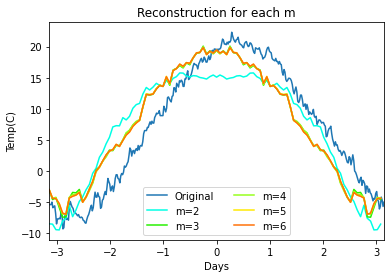

In [23]:
def z(i, m, x):    # p 個の基底のうち，m 主成分で近似したもとの関数
    S = 0
    for j in range(p):
        for k in range(m):
            for r in range(p):
                S = S + C[i, j] * B[j, k] * B[r, k] * g(r, x)
    return S


x_seq = np.arange(-np.pi, np.pi, 2 * np.pi / 100)
plt.figure()
plt.xlim(-np.pi, np.pi)
# plt.ylim(-15, 25)
plt.xlabel("Days")
plt.ylabel("Temp(C)")
plt.title("Reconstruction for each m")
plt.plot(x, df[13], label="Original")
for m in range(2, 7):
    plt.plot(x_seq, z(13, m, x_seq), c=color[m], label="m=%d" % m)
plt.legend(loc="lower center", ncol=2)

Text(0.5, 1.0, 'Ratio')

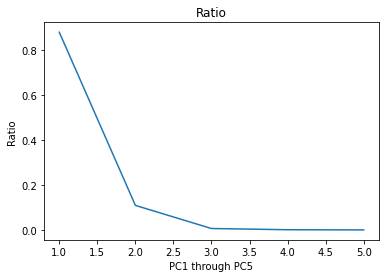

In [24]:
lam = pca.explained_variance_
ratio = lam / sum(lam)  # Or use pca.explained_variance_ratio_
plt.plot(range(1, 6), ratio[:5])
plt.xlabel("PC1 through PC5")
plt.ylabel("Ratio")
plt.title("Ratio")

[[-5.17047158e-01 -2.43880783e-01  7.48988282e-02 ...  5.48412398e-04
  -1.22748580e-03  2.24265035e-02]
 [-7.31215098e-01 -3.44899509e-01  1.05922938e-01 ...  7.75572235e-04
  -1.73592705e-03 -1.60570418e-02]
 [ 3.13430279e-01 -6.12932605e-01  1.50738649e-01 ... -6.99018710e-03
   1.19586600e-03  7.05362480e-01]
 ...
 [ 3.08129210e-05 -2.83373697e-03  8.28893867e-03 ...  1.35931675e-01
  -2.34867483e-01 -7.04688691e-03]
 [ 1.47021532e-03  3.25749669e-03 -4.83933350e-03 ... -1.32596334e-01
   1.60270831e-01 -3.80219029e-03]
 [ 1.47021531e-03  3.25749669e-03 -4.83933350e-03 ... -1.32596334e-01
   1.60270831e-01 -9.28251207e-03]]


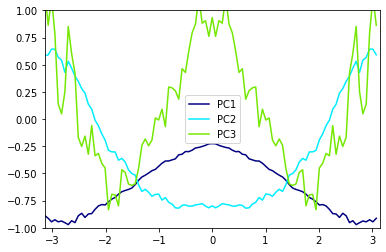

In [25]:
def h(coef, x):    # 係数を用いて関数を定義
    S = 0
    for j in range(p):
        S = S + coef[j] * g(j, x)
    return S


print(B)
plt.figure()
plt.xlim(-np.pi, np.pi)
plt.ylim(-1, 1)
for j in range(3):
    plt.plot(x_seq, h(B[:, j], x_seq), c=colors[j], label="PC%d" % (j+1))
plt.legend(loc="best")

['Q', 'M', 'O', 'T', 'W', 'C', 'V', 'V']


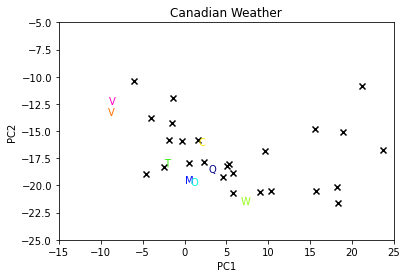

In [26]:
place = X.iloc[:, 1]
index = [9, 11, 12, 13, 16, 23, 25, 26]
others = [x for x in range(34) if x not in index]
first = [place[i][0] for i in index]
print(first)
plt.figure()
plt.xlim(-15, 25)
plt.ylim(-25, -5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Canadian Weather")
plt.scatter(xx[others, 0], xx[others, 1], marker="x", c="k")
for i in range(8):
    l = plt.text(xx[index[i], 0], xx[index[i], 1], s=first[i], c=color[i])